In [80]:
import numpy as np
import tensorflow as tf
import glob
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [81]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [82]:
train_filelist = glob.glob('./images/train/*.jpg')
test_filelist = glob.glob('./images/test/*.jpg')

In [83]:
DS500_train_dataset = []
for fname in train_filelist:
    im = Image.open(fname)
    im = im.resize((321, 481))
    img = np.array(im)

    DS500_train_dataset.append(img)

DS500_test_dataset = []
for fname in test_filelist:
    im = Image.open(fname)
    im = im.resize((321, 481))
    img = np.array(im)

    DS500_test_dataset.append(img)


In [84]:
DS500_train_dataset = np.array(DS500_train_dataset)
DS500_test_dataset = np.array(DS500_test_dataset)

In [85]:
def compose_image(mnist_data, background_data):
    w, h, _ = background_data.shape
    dw, dh, _ = mnist_data.shape
    x = np.random.randint(0, w - dw)
    y = np.random.randint(0, h - dh)
    bg = background_data[x:x + dw, y:y + dh]
    return np.abs(bg - mnist_data).astype(np.uint8)

def mnist_to_img(x):
    x = (x > 0).astype(np.float32)
    d = x.reshape([28, 28, 1]) * 255
    return np.concatenate([d, d, d], 2)

In [86]:
def create_mnistm(X,background_data):
    X_ = np.zeros([X.shape[0], 28, 28, 3], np.uint8)
    for i in range(X.shape[0]):
        index = np.random.choice(background_data.shape[0], 1, replace=False)
        bg_img = background_data[index][0]
        
        mnist_image = mnist_to_img(X[i])

        mnist_image = compose_image(mnist_image, bg_img)
        X_[i] = mnist_image
    return X_

In [87]:
mnistm_train = create_mnistm(X_train, DS500_train_dataset)
mnistm_test = create_mnistm(X_test, DS500_test_dataset)

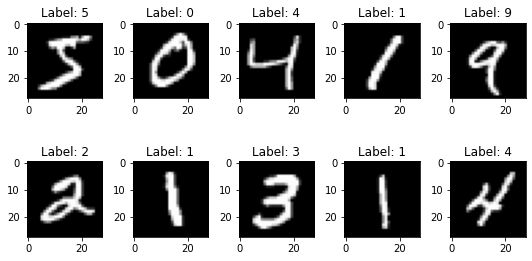

In [88]:
num_row = 2
num_col = 5
num = 10
images = X_train[:num]
labels = y_train[:num]
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

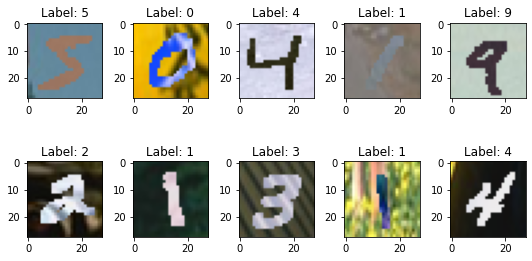

In [89]:
images = mnistm_train[:num]
labels = y_train[:num]
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()